In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('datas/train_loan_data.csv')
test_data = pd.read_csv('datas/test_loan_data.csv')
train_original = train_data
test_original = test_data

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [5]:
train_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

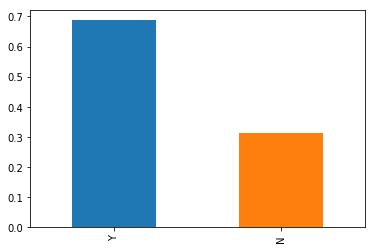

In [6]:
train_data['Loan_Status'].value_counts(normalize=True).plot.bar()

# Independent Variable (Categorical: sometimes called nominal)

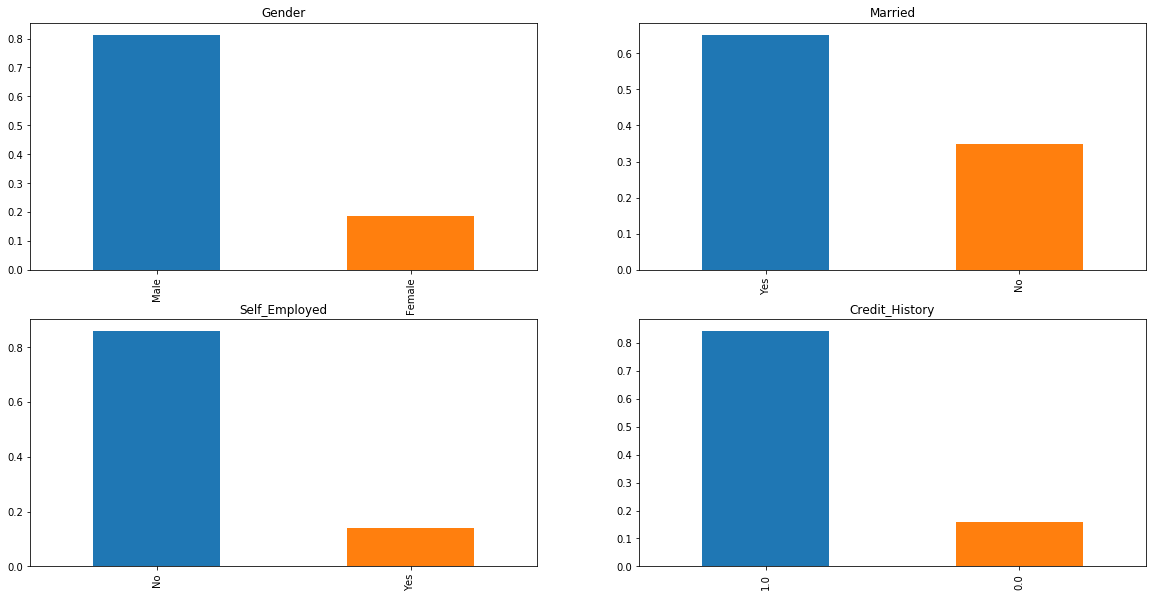

In [7]:
plt.figure(1)
plt.subplot(221)
train_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')

plt.subplot(222)
train_data['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

plt.subplot(224)
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

# Independent Variable (Ordianl: clear ordering of the variables)

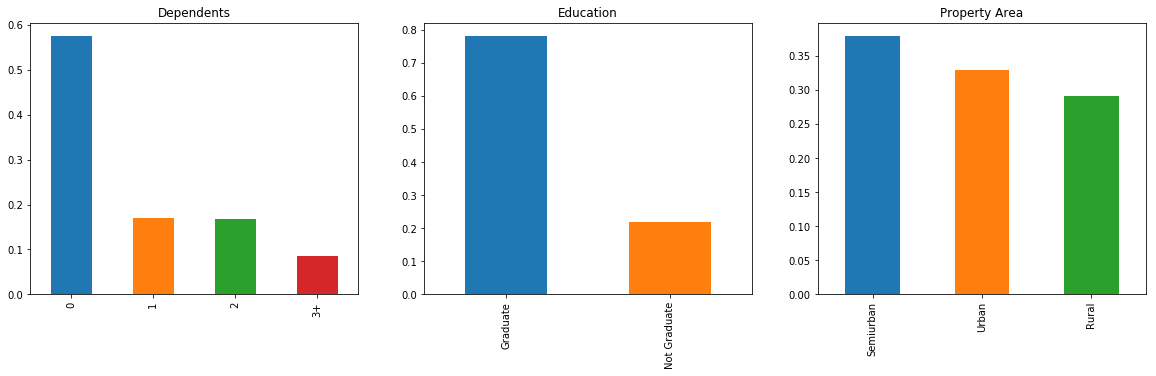

In [8]:
plt.figure(1)
plt.subplot(131)
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20, 5), title="Dependents")
plt.subplot(132)
train_data['Education'].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title="Property Area")

plt.show()

# Independant Variable (Numerical)

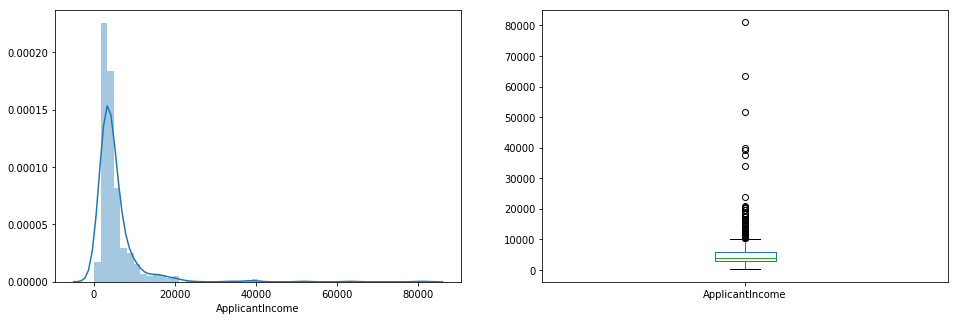

In [9]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['ApplicantIncome']);

plt.subplot(122)
train_data['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

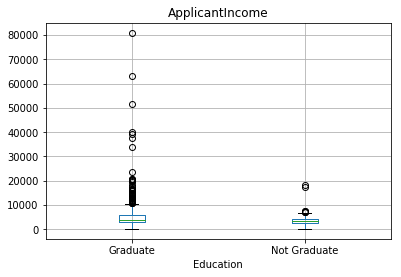

In [10]:
train_data.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

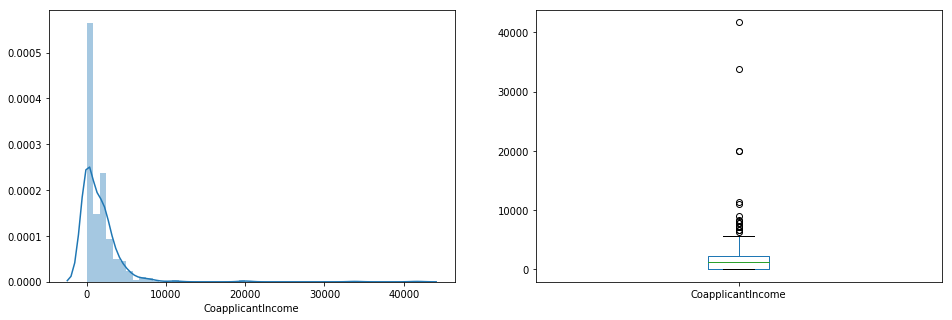

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train_data['CoapplicantIncome']);

plt.subplot(122)
train_data['CoapplicantIncome'].plot.box(figsize = (16, 5))

plt.show()

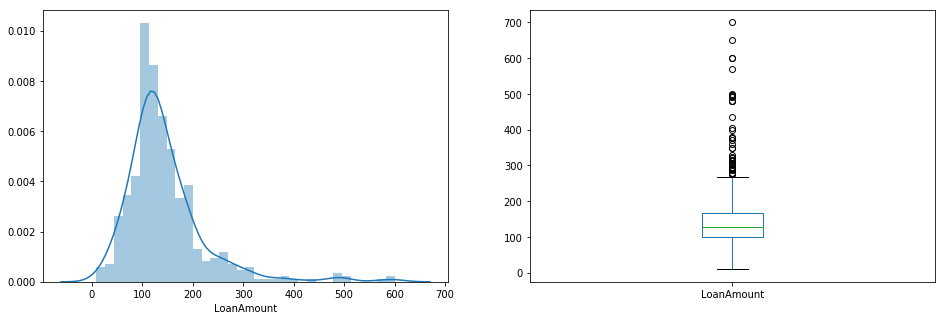

In [12]:
plt.figure(1)
plt.subplot(121)
df = train_data.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train_data['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# Bivariate Analysis

Categorical Independent Variabe Vs Target Variable

In [13]:
Gender = pd.crosstab(train_data["Gender"], train_data['Loan_Status'])

In [14]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [15]:
Gender.sum(1)

Gender
Female    112
Male      489
dtype: int64

In [16]:
Gender.sum()

Loan_Status
N    187
Y    414
dtype: int64

In [17]:
Gender.div(Gender.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


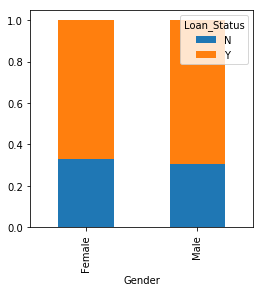

In [18]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [19]:
Gender.div(Gender.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [20]:
Married = pd.crosstab(train_data['Married'], train_data['Loan_Status'])
Dependents = pd.crosstab(train_data['Dependents'], train_data['Loan_Status'])
Education = pd.crosstab(train_data['Education'], train_data['Loan_Status'])
Self_Employed = pd.crosstab(train_data['Self_Employed'], train_data['Loan_Status'])

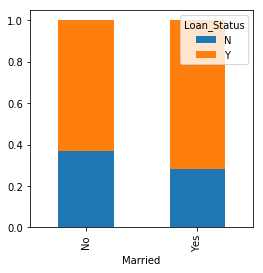

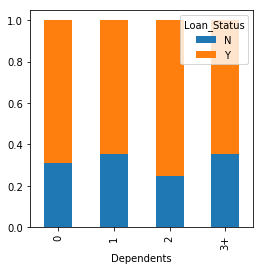

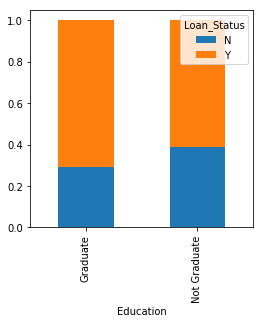

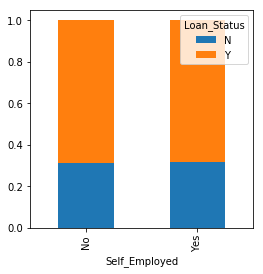

In [21]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()


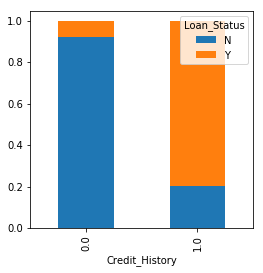

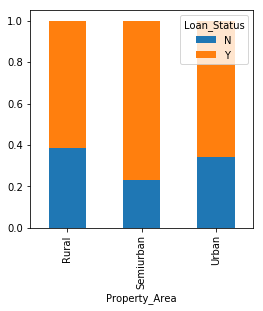

In [22]:
Credit_History = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
Property_Area = pd.crosstab(train_data['Property_Area'], train_data['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

# Numerical Independent Variable Vs Target Variable

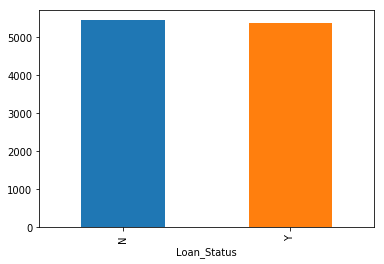

In [23]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [24]:
train_data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [25]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']

train_data['Income_bin'] = pd.cut(train_data['ApplicantIncome'], bins, labels=group, include_lowest=True)

In [26]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


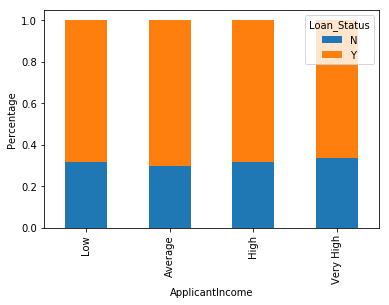

In [27]:
Income_bin = pd.crosstab(train_data['Income_bin'], train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("ApplicantIncome")
p = plt.ylabel('Percentage')

In [28]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train_data['Coapplicant_Income_bin'] = pd.cut(train_data['CoapplicantIncome'], bins, labels=group, include_lowest=True)

In [29]:
train_data['CoapplicantIncome'].max()

41667.0

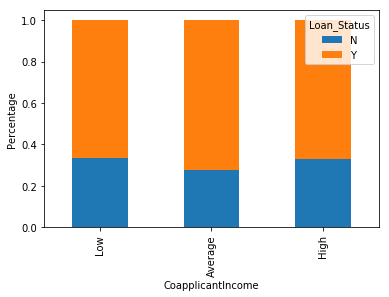

In [30]:
Coapplicant_Income_bin = pd.crosstab(train_data['Coapplicant_Income_bin'], train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel("CoapplicantIncome")
p = plt.ylabel('Percentage')

In [31]:
train_data['Total_Income'] = train_data['ApplicantIncome']+train_data['CoapplicantIncome']

In [32]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Averages', 'High', "Very high"]
train_data['Total_Income_bin'] = pd.cut(train_data['Total_Income'], bins, labels=group, include_lowest=True)

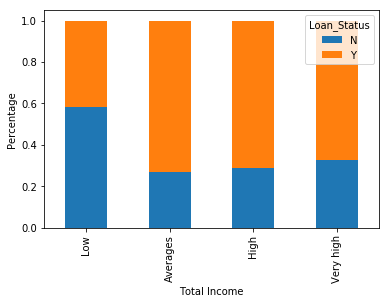

In [33]:
Total_Income_bin = pd.crosstab(train_data["Total_Income_bin"], train_data["Loan_Status"])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
p = plt.ylabel("Percentage")

In [34]:
bins = [0,100,200, 700]
group = ['Low', 'Average', 'High']
train_data['LoanAmount_bin'] = pd.cut(train_data['LoanAmount'], bins, labels=group, include_lowest=True)

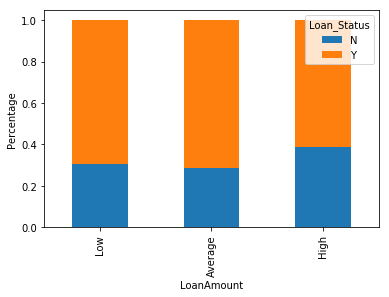

In [35]:
LoanAmount_bin = pd.crosstab(train_data['LoanAmount_bin'], train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('LoanAmount')
p = plt.ylabel('Percentage')

In [36]:
df = train_data

In [37]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,Low,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,Low,3000.0,Averages,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,Low,6000.0,High,Average


In [38]:
train_data = train_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [39]:
# train_data = df

In [40]:
train_data['Dependents'].replace('3+', 3, inplace=True)
test_data['Dependents'].replace('3+', 3, inplace=True)
train_data['Loan_Status'].replace('N', 0, inplace=True)
train_data['Loan_Status'].replace('Y', 1, inplace=True)

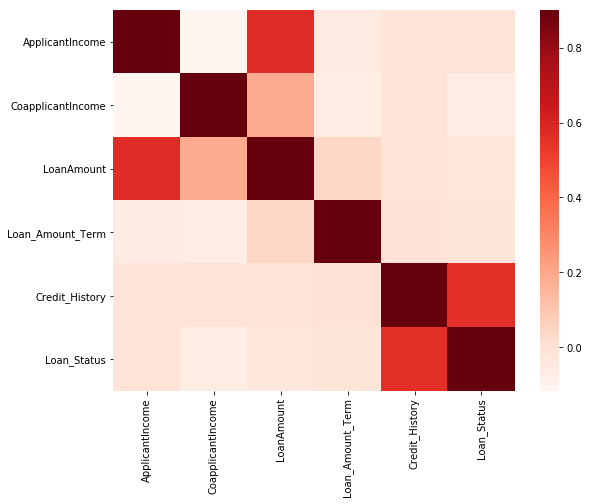

In [41]:
matrix = train_data.corr()
plt.subplots(figsize=(9, 7))
sns.heatmap(matrix, vmax=.9, cmap='Reds')

In [42]:
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


# Missing Value and Outlier Treatment

In [43]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data["Married"].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

In [45]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
train_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [47]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

In [48]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(test_data["Married"].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)

test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)

In [50]:
b = pd.Series([2,5,6,7,4,3,4,5,3,5, 400])

In [51]:
b.describe()

count     11.000000
mean      40.363636
std      119.286439
min        2.000000
25%        3.500000
50%        5.000000
75%        5.500000
max      400.000000
dtype: float64

In [52]:
a.describe()

NameError: name 'a' is not defined

In [53]:
a.median()

NameError: name 'a' is not defined

In [54]:
sorted(b)

[2, 3, 3, 4, 4, 5, 5, 5, 6, 7, 400]

In [55]:
train_data = train_data.drop('Loan_ID', axis=1)

In [56]:
test_data = test_data.drop('Loan_ID', axis=1)

In [57]:
X = train_data.drop('Loan_Status', axis=1)
y = train_data.Loan_Status

In [58]:
X = pd.get_dummies(X)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [59]:
train_data.shape

(614, 21)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [63]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
predict_cv = model.predict(x_cv)

In [65]:
accuracy_score(y_cv, predict_cv)

0.7891891891891892

In [66]:
predict_test = model.predict(test_data)

In [69]:
submission = pd.read_csv('datas/submission.csv')

In [70]:
submission['Loan_Status'] = predict_test
submission['Loan_ID'] = test_original['Loan_ID']

In [71]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [72]:
submission['Loan_Status'].value_counts()

Y    307
N     60
Name: Loan_Status, dtype: int64

In [73]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('sample_submission.csv', index=False)